Utilizaremos Regresión Logistica para predecir la probabilidad de un evento ocurriendo en funcion de otros factores.
Podriamos determinar si el pasajero sobrevivirá o no

In [1]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression -> Librería para Regresión Lineal
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data=pd.read_csv('Titanic-Dataset.csv')
data.head(10)
#print(data.describe());

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

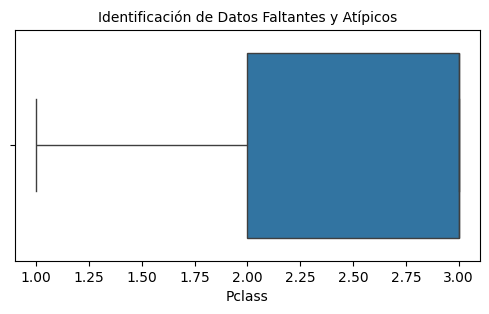

In [3]:
plt.figure(figsize=(6,3))
sns.boxplot(x=data['Pclass'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

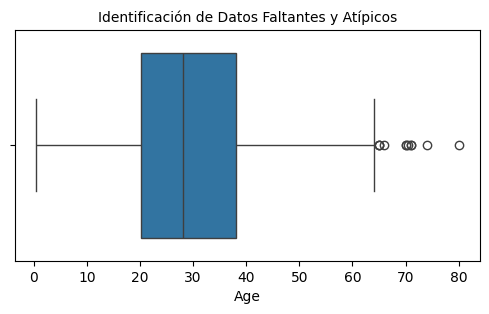

In [4]:
plt.figure(figsize=(6,3))
sns.boxplot(x=data['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

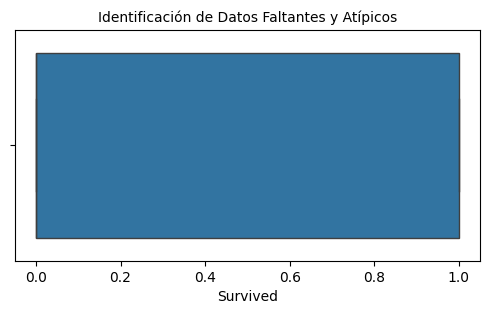

In [5]:
plt.figure(figsize=(6,3))
sns.boxplot(x=data['Survived'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

<Axes: xlabel='Fare'>

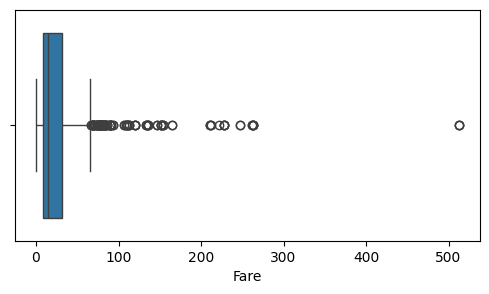

In [6]:
plt.figure(figsize=(6,3))
sns.boxplot(x=data['Fare'])

In [7]:
#Encontrar valores atipicos o Nan en el dataset de las columnas representativos
print("Cantidad de Registros con Clase Nan: ",data['Pclass'].isnull().sum())
print("Cantidad de Registros con Edad Nan: ",data['Age'].isnull().sum())
print("Cantidad de Registros con Sex Nan: ",data['Sex'].isnull().sum())
print("Cantidad de Registros con Survived Nan: ",data['Survived'].isnull().sum())

print("Cantidad de Registros con cero en Nivel de Clase: ",data['Pclass'].isin([0]).sum())
print("Cantidad de Registros con cero en  Edad: ",data['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en  Sex: ",data['Sex'].isin([0]).sum())

#PassengerId	Survived	Pclass	Name	Sex	Age	SibSp	Parch	Ticket	Fare	Cabin	Embarked

Cantidad de Registros con Clase Nan:  0
Cantidad de Registros con Edad Nan:  177
Cantidad de Registros con Sex Nan:  0
Cantidad de Registros con Survived Nan:  0
Cantidad de Registros con cero en Nivel de Clase:  0
Cantidad de Registros con cero en  Edad:  0
Cantidad de Registros con cero en  Sex:  0


In [8]:
#Reemplazamos los valores en cero en Nivel de Clase por el promedio
data['Age']=data['Age'].fillna(data['Age'].mean())
print("Cantidad de Registros con Edad Nan: ",data['Age'].isnull().sum())

Cantidad de Registros con Edad Nan:  0


In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [10]:
#PassengerId	Survived	Pclass	Name	Sex	Age	SibSp	Parch	Ticket	Fare	Cabin	Embarked
#Seleccionamos las columnas representativas
data=data[["Survived", "Pclass", "Age"]]
data[['Age']] = data[['Age']].astype(int)
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Age       891 non-null    int32
dtypes: int32(1), int64(2)
memory usage: 17.5 KB
None
         Survived      Pclass         Age
count  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.544332
std      0.486592    0.836071   13.013778
min      0.000000    1.000000    0.000000
25%      0.000000    2.000000   22.000000
50%      0.000000    3.000000   29.000000
75%      1.000000    3.000000   35.000000
max      1.000000    3.000000   80.000000


In [11]:
#Caracteristica de Interes.
Survived=data["Survived"].value_counts()
print(Survived)

Survived
0    549
1    342
Name: count, dtype: int64


In [12]:
#Dividir Dataset en Test y Train
X=data.drop("Survived", axis=1)
Y=data["Survived"]

X_train, X_Test, Y_train, Y_Test= train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)


In [13]:
print(X_Test)

     Pclass  Age
288       2   42
869       3    4
182       3    9
684       2   60
599       1   49
..      ...  ...
882       3   22
434       1   50
304       3   29
500       3   17
633       1   29

[223 rows x 2 columns]


In [14]:
print(Y_Test)

288    1
869    1
182    0
684    0
599    1
      ..
882    0
434    0
304    0
500    0
633    0
Name: Survived, Length: 223, dtype: int64


In [15]:
print(X_train)

     Pclass  Age
671       1   31
417       2   18
634       3    9
323       2   22
379       3   19
..      ...  ...
131       3   20
490       3   29
528       3   39
48        3   29
80        3   22

[668 rows x 2 columns]


In [16]:
print(Y_train)

671    0
417    1
634    0
323    1
379    0
      ..
131    0
490    0
528    0
48     0
80     0
Name: Survived, Length: 668, dtype: int64


In [17]:
#Entrenar modelo configurando los hiperparametros.
modelo_reg= LogisticRegression(solver= "liblinear")
modelo_reg.fit(X_train, Y_train)

prediccion= modelo_reg.predict(X_Test)
print(prediccion)

[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 1]


## DESEMPEÑO DEL MODELO

In [18]:
# Desempeño del modelo de regresión
print(classification_report(Y_Test, prediccion))


              precision    recall  f1-score   support

           0       0.70      0.88      0.78       137
           1       0.67      0.41      0.51        86

    accuracy                           0.70       223
   macro avg       0.69      0.64      0.64       223
weighted avg       0.69      0.70      0.67       223



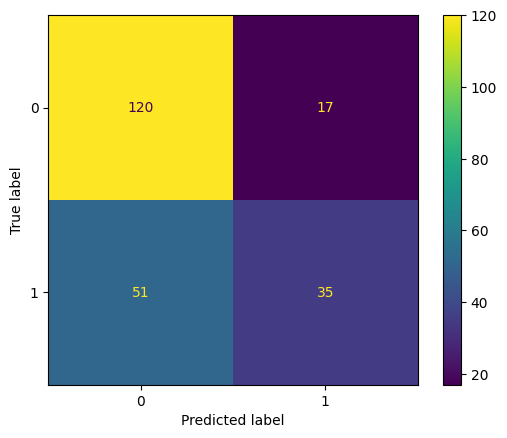

In [19]:
#Graficas
#Matriz de confusion
cm=confusion_matrix(Y_Test, prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

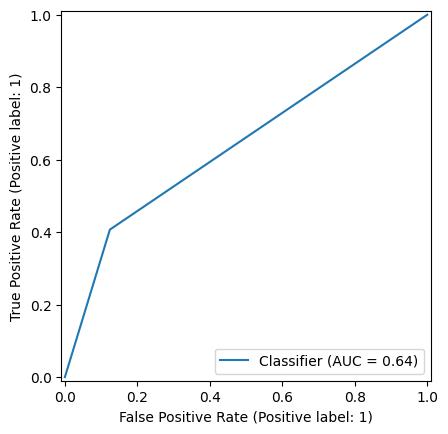

In [20]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_Test, prediccion)
plt.show()

Del desempeño del modelo se puede describir:

- Precisión: Aquí la precisión para la clase "No Sobreviviente" es 0.70, lo que significa que el 70% de los predichos como no sobreviviente por el modelo eran en realidad no sobrevivientes. Por otro lado, para la clase "Sobreviviente" tenemos un 0.67 indicando que el 67% de los predichos como sobrevivientes realmente si lo eran.

- Recall: Tenemos el Recall para la clase "No Sobreviviente" es 0,88, lo que indica que el modelo identificó correctamente al 88% de todos los "No Sobrevivientes". Por otro lado, para la clase "Sobreviviente" tenemos un 0.41 indicando que reconoció correctamente el 41% de los casos predichos como sobrevivientes.

- F1 Score:  Aquí la puntuación F1 para la clase "No Sobreviviente" es 0.78, lo que indica un equilibrio entre precisión y recuerdo.


De la Matriz de Confusión podemos interpretar:

- Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctamente como falso 120

- Verdaderos positivos: el recuento de observaciones que un clasificador predijo correctamente como Verdadero 35

- Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente como Verdaderas 17

- Falsos negativos: el recuento de observaciones que un clasificador predijo incorrectamente como falso 51

De la curva de precisión del modelo se puede interpretar:

- El AUC es 0,64 lo que significa que el 64% de las predicciones del clasificador son correctas en todos los umbrales de clasificación.
